In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import missingno as msno

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")

# Any results you write to the current directory are saved as output.

In [222]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [223]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [225]:
df_test['date']  = df_test.datetime.apply(lambda x: x.split()[0])
df_test['hour'] = df_test.datetime.apply(lambda x: x.split()[1].split(':')[0])
df_test['weekday'] = df_test.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
df_test['month'] = df_test.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)
df_test.drop(['datetime'], axis=1, inplace=True)
df_test['year']=[d.split('-')[0] for d in df_test.date]
df_test['day']=[d.split('-')[2] for d in df_test.date]

In [226]:
df_train['date']  = df_train.datetime.apply(lambda x: x.split()[0])
df_train['hour'] = df_train.datetime.apply(lambda x: x.split()[1].split(':')[0])

In [227]:
df_train['weekday'] = df_train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
df_train['month'] = df_train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)

In [228]:
df_train.drop(['datetime'], axis=1, inplace=True)

In [229]:
df_train['year']=[d.split('-')[0] for d in df_train.date]
df_train['day']=[d.split('-')[2] for d in df_train.date]

In [230]:
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,5,1,2011,01
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,5,1,2011,01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,5,1,2011,01


In [231]:
time1 = df_train[df_train['hour'].isin(['00', '01', '02'])]
time2 = df_train[df_train['hour'].isin(['03', '04', '05'])]
time3 = df_train[df_train['hour'].isin(['06', '07', '08'])]
time4 = df_train[df_train['hour'].isin(['09', '10', '11'])]
time5 = df_train[df_train['hour'].isin(['12', '13', '14'])]
time6 = df_train[df_train['hour'].isin(['15', '16', '17'])]
time7 = df_train[df_train['hour'].isin(['18', '19', '20'])]
time8 = df_train[df_train['hour'].isin(['21', '22', '23'])]

In [232]:
#checktime 변수 생성
df_train['checktime'] = None

In [233]:
df_train.loc[df_train["hour"] == '00', "checktime"] = '1'
df_train.loc[df_train["hour"] == '01', "checktime"] = '1'
df_train.loc[df_train["hour"] == '02', "checktime"] = '1'

df_train.loc[df_train["hour"] == '03', "checktime"] = '2'
df_train.loc[df_train["hour"] == '04', "checktime"] = '2'
df_train.loc[df_train["hour"] == '05', "checktime"] = '2'

df_train.loc[df_train["hour"] == '06', "checktime"] = '3'
df_train.loc[df_train["hour"] == '07', "checktime"] = '3'
df_train.loc[df_train["hour"] == '08', "checktime"] = '3'

df_train.loc[df_train["hour"] == '09', "checktime"] = '4'
df_train.loc[df_train["hour"] == '10', "checktime"] = '4'
df_train.loc[df_train["hour"] == '11', "checktime"] = '4'

df_train.loc[df_train["hour"] == '12', "checktime"] = '5'
df_train.loc[df_train["hour"] == '13', "checktime"] = '5'
df_train.loc[df_train["hour"] == '14', "checktime"] = '5'

df_train.loc[df_train["hour"] == '15', "checktime"] = '6'
df_train.loc[df_train["hour"] == '16', "checktime"] = '6'
df_train.loc[df_train["hour"] == '17', "checktime"] = '6'

df_train.loc[df_train["hour"] == '18', "checktime"] = '7'
df_train.loc[df_train["hour"] == '19', "checktime"] = '7'
df_train.loc[df_train["hour"] == '20', "checktime"] = '7'

df_train.loc[df_train["hour"] == '21', "checktime"] = '8'
df_train.loc[df_train["hour"] == '22', "checktime"] = '8'
df_train.loc[df_train["hour"] == '23', "checktime"] = '8'

In [234]:
df_train.head(100)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year,day,checktime
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00,5,1,2011,01,1
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01,5,1,2011,01,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02,5,1,2011,01,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03,5,1,2011,01,2
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04,5,1,2011,01,2
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,05,5,1,2011,01,2
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01,06,5,1,2011,01,3
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011-01-01,07,5,1,2011,01,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011-01-01,08,5,1,2011,01,3
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011-01-01,09,5,1,2011,01,4


In [235]:
time1 = time1['count']
time2 = time2['count']
time3 = time3['count']
time4 = time4['count']
time5 = time5['count']
time6 = time6['count']
time7 = time7['count']
time8 = time8['count']

In [236]:
sum1 = 0
for i in time1:
    sum1 += i
sum2 = 0
for i in time2:
    sum2 += i
sum3 = 0
for i in time3:
    sum3 += i
sum4 = 0
for i in time4:
    sum4 += i
sum5 = 0
for i in time5:
    sum5 += i
sum6 = 0
for i in time6:
    sum6 += i
sum7 = 0
for i in time7:
    sum7 += i
sum8 = 0
for i in time8:
    sum8 += i

Text(0.5, 1.0, '3hours count')

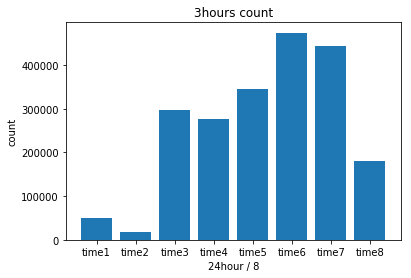

In [237]:
#hour을 3시간대 별로 나누어 그린 그래프
y1_value = (sum1, sum2, sum3, sum4, sum5, sum6, sum7, sum8)
x_name=('time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8')
n_groups = len(x_name)
index = np.arange(n_groups)

plt.bar(index, y1_value, tick_label=x_name, align='center')

plt.xlabel('24hour / 8')
plt.ylabel('count')
plt.title('3hours count')
#plt.xlim( -1, n_groups)
#plt.ylim( 0, 400)plt.show()

In [238]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null int64
month         10886 non-null int64
year          10886 non-null object
day           10886 non-null object
checktime     10886 non-null object
dtypes: float64(3), int64(10), object(5)
memory usage: 1.5+ MB


In [239]:
df_train['season'] = df_train['season'].astype(str)
df_train['weather'] = df_train['weather'].astype(str)
df_train['hour'] = df_train['hour'].astype(str)
df_train['weekday'] = df_train['weekday'].astype(str)
df_train['month'] = df_train['month'].astype(str)
df_train['workingday'] = df_train['workingday'].astype(str)
df_train['holiday'] = df_train['holiday'].astype(str)

In [240]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
season        10886 non-null object
holiday       10886 non-null object
workingday    10886 non-null object
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null object
month         10886 non-null object
year          10886 non-null object
day           10886 non-null object
checktime     10886 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 1.5+ MB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


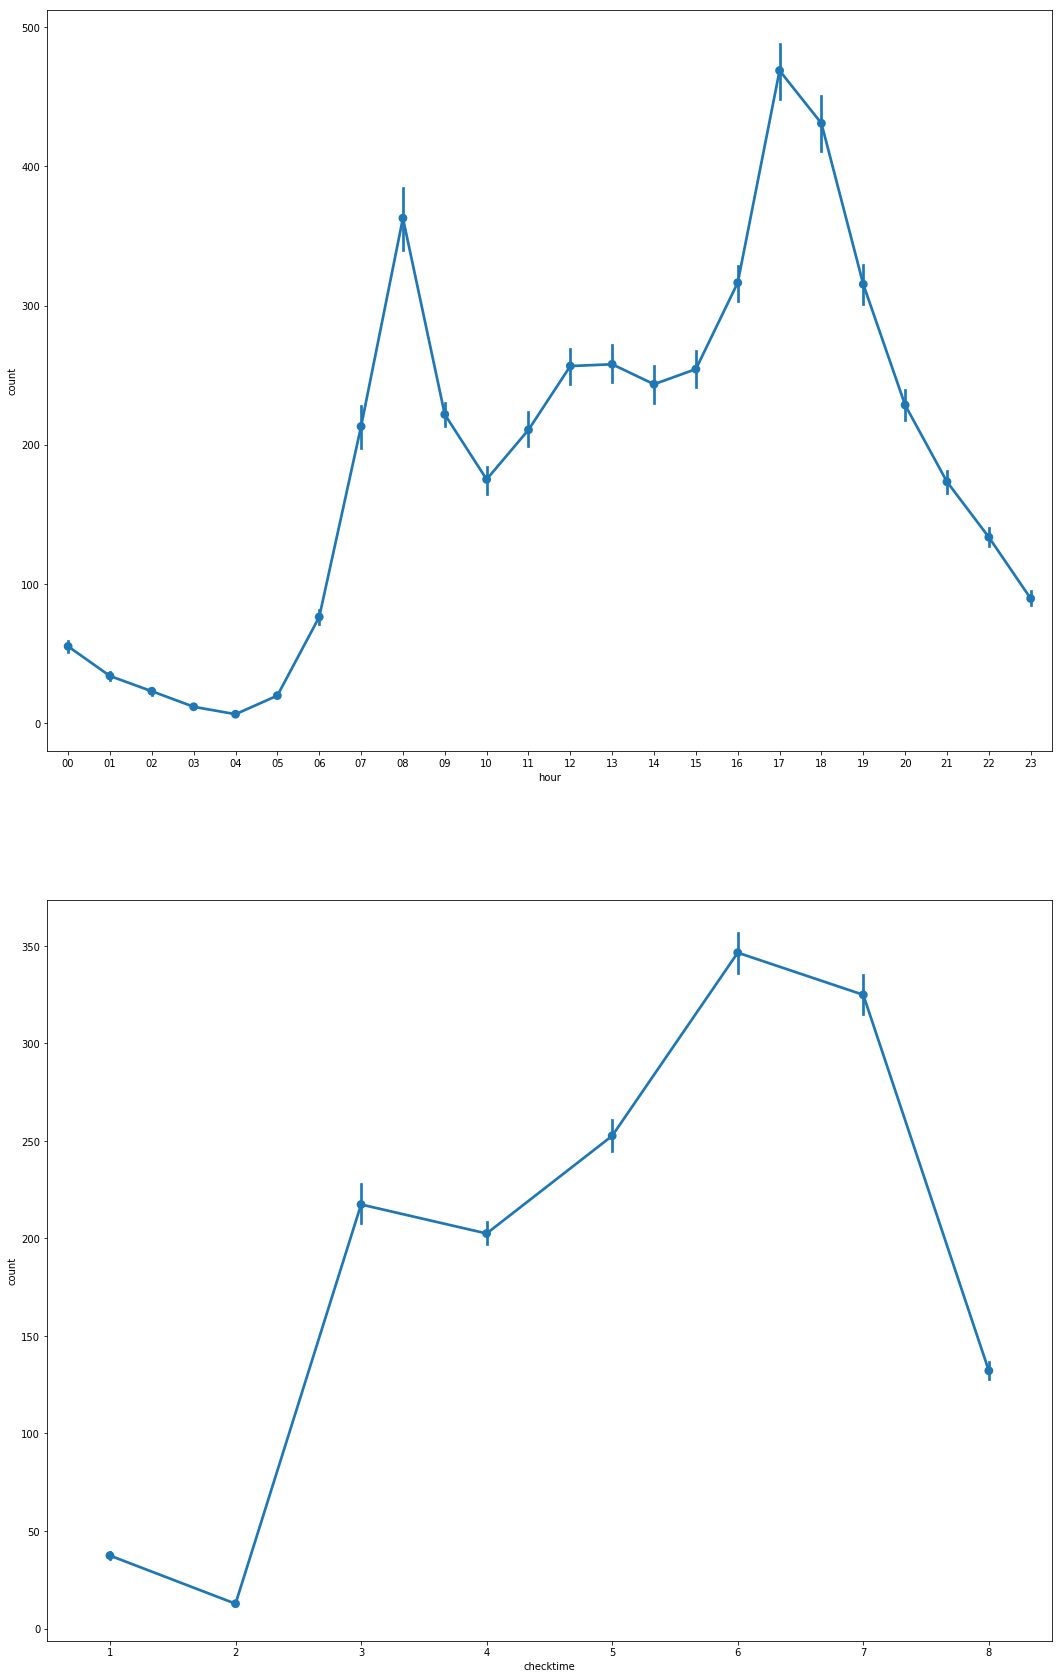

In [241]:
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18,30)

sns.pointplot(data=df_train, x="hour", y="count", ax=axes[0])
sns.pointplot(data=df_train, x="checktime", y="count", ax=axes[1])

In [242]:
df_train[df_train.columns[1:]].corr()['count'][:]

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


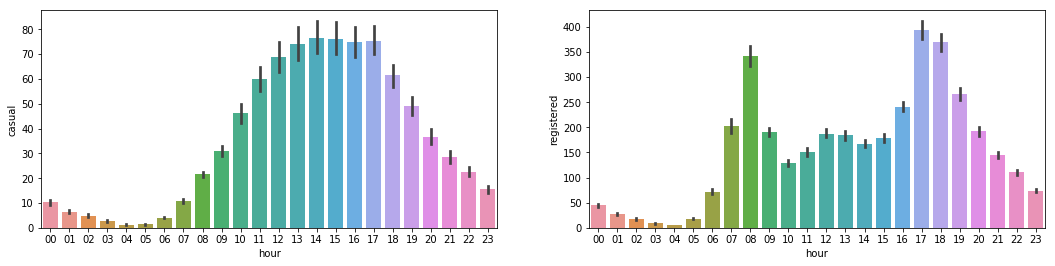

In [243]:
# 등록자와 비등록자 count와 시간대별 이용이 다름을 나타내는 그래프
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=df_train, x="hour", y="casual", ax=ax1)
sns.barplot(data=df_train, x="hour", y="registered", ax=ax2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


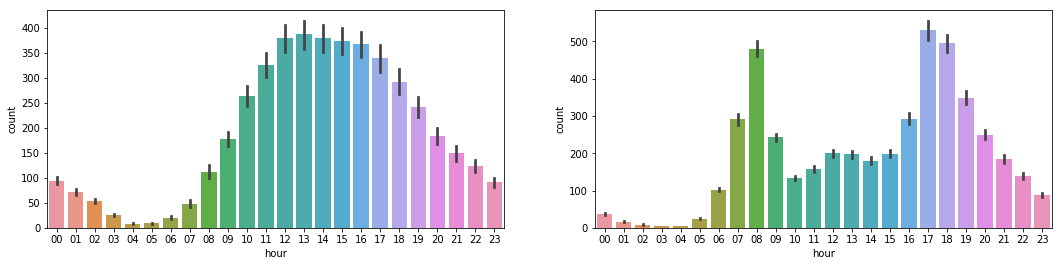

In [244]:
# workingday 가 0일때와 1일때 count한 그래프
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=df_train.loc[df_train["workingday"] == '0'], x="hour", y="count", ax=ax1)
sns.barplot(data=df_train.loc[df_train["workingday"] == '1'], x="hour", y="count", ax=ax2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


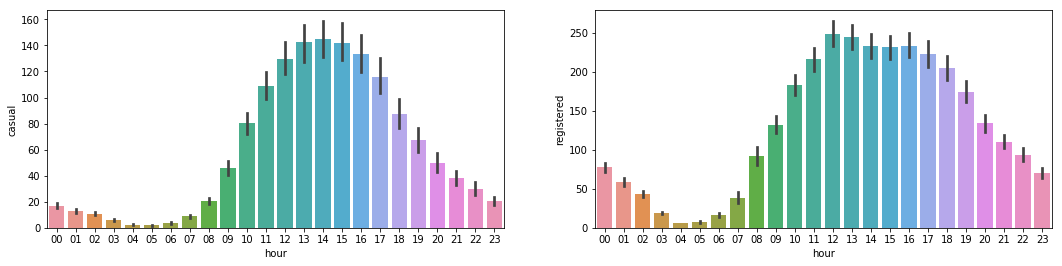

In [245]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=df_train.loc[df_train["workingday"] == '0'], x="hour", y="casual", ax=ax1)
sns.barplot(data=df_train.loc[df_train["workingday"] == '0'], x="hour", y="registered", ax=ax2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


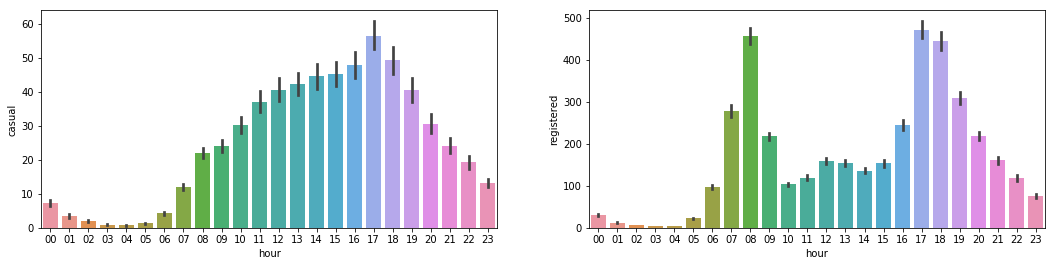

In [246]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=df_train.loc[df_train["workingday"] == '1'], x="hour", y="casual", ax=ax1)
sns.barplot(data=df_train.loc[df_train["workingday"] == '1'], x="hour", y="registered", ax=ax2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


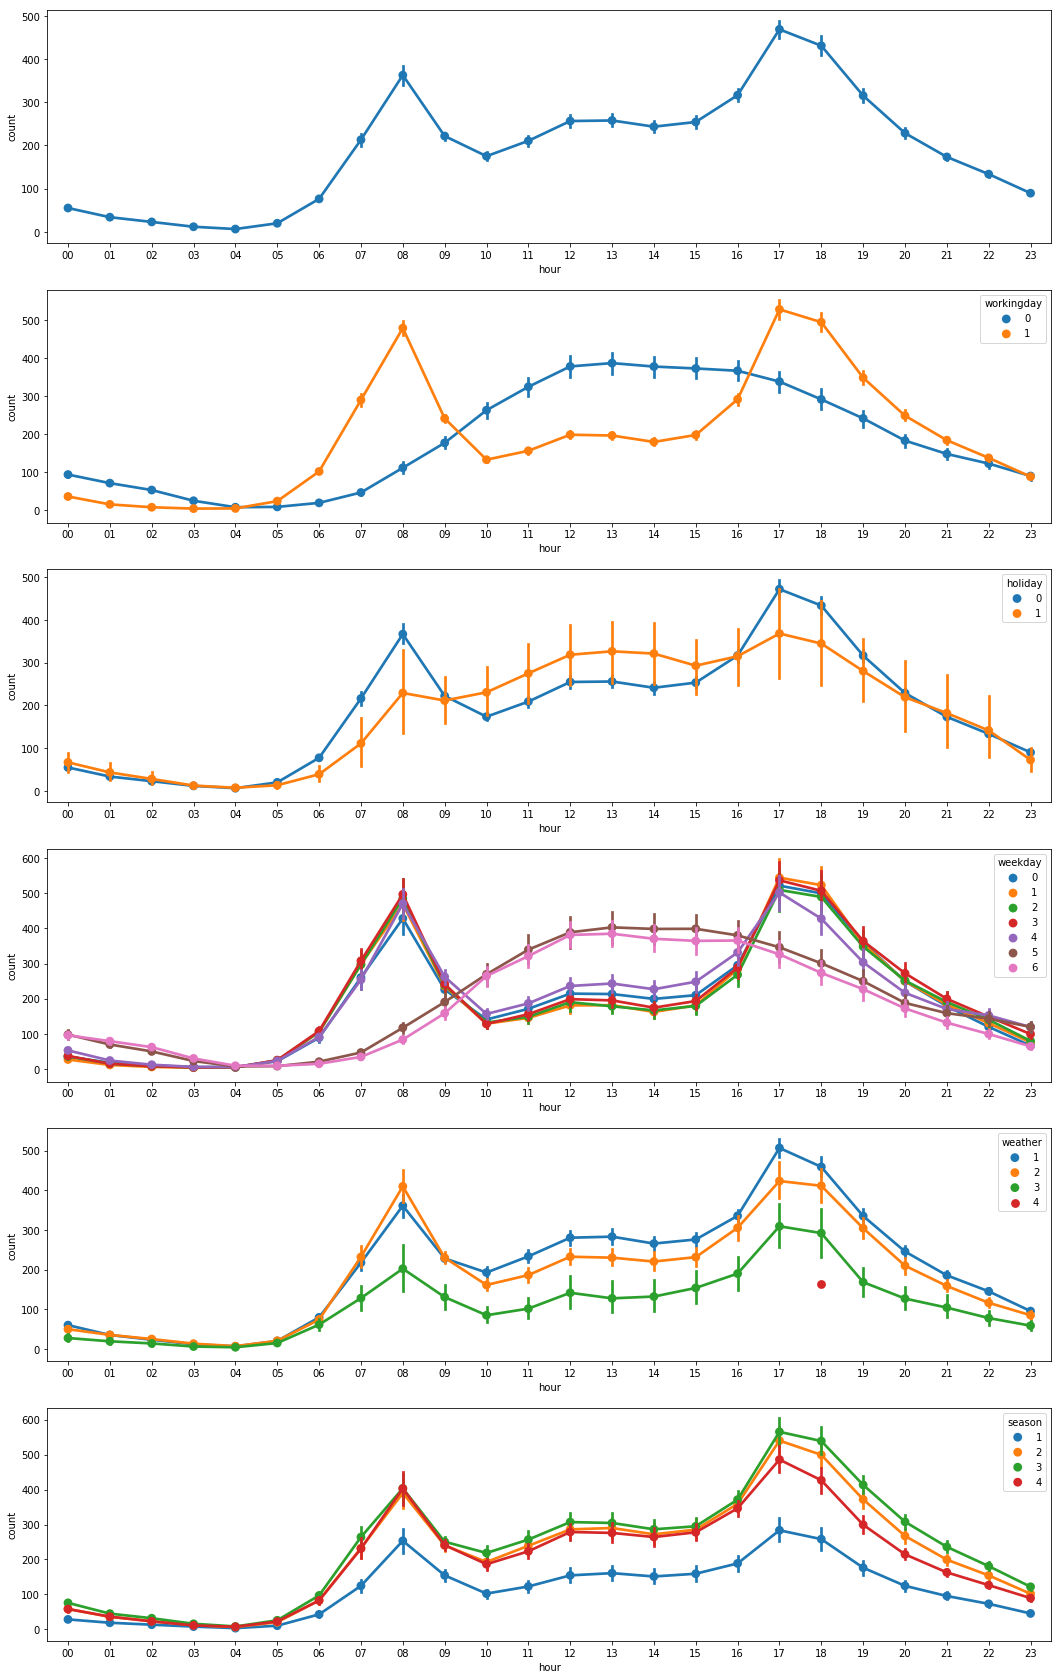

In [247]:
fig, axes = plt.subplots(nrows = 6)
fig.set_size_inches(18,30)

sns.pointplot(data=df_train, x="hour", y="count", ax=axes[0])
sns.pointplot(data=df_train, x="hour", y="count", hue = "workingday", ax=axes[1])
sns.pointplot(data=df_train, x="hour", y="count", hue = "holiday", ax=axes[2])
sns.pointplot(data=df_train, x="hour", y="count", hue = "weekday", ax=axes[3])
sns.pointplot(data=df_train, x="hour", y="count", hue = "weather", ax=axes[4])
sns.pointplot(data=df_train, x="hour", y="count", hue = "season", ax=axes[5])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


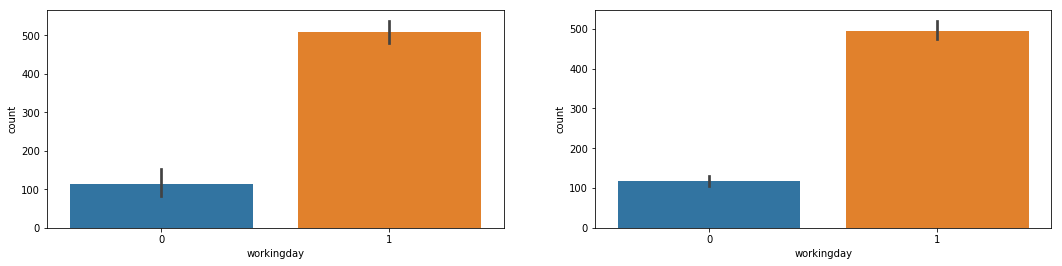

In [248]:
goodweather = df_train.loc[df_train["weather"] == '1']
sosoweather = df_train.loc[df_train["weather"] == '2']
#sosoweather = sosoweather.loc[sosoweather["hour"] == '07']
goodweather = goodweather.loc[goodweather["hour"] == '08']
sosoweather = sosoweather.loc[sosoweather["hour"] == '08']

figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=sosoweather, x="workingday", y="count", ax=ax1)
sns.barplot(data=goodweather, x="workingday", y="count", ax=ax2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


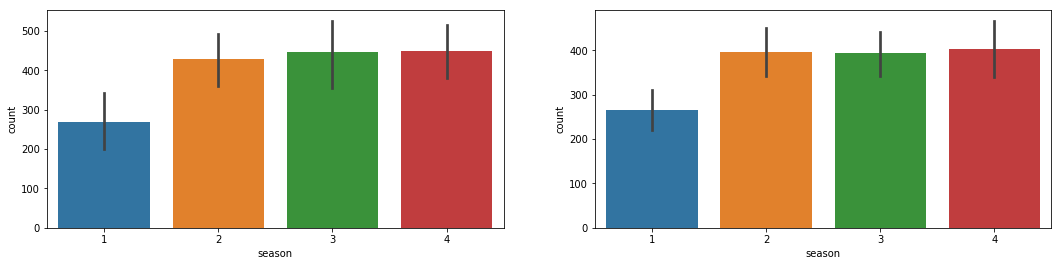

In [249]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=sosoweather, x="season", y="count", ax=ax1)
sns.barplot(data=goodweather, x="season", y="count", ax=ax2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


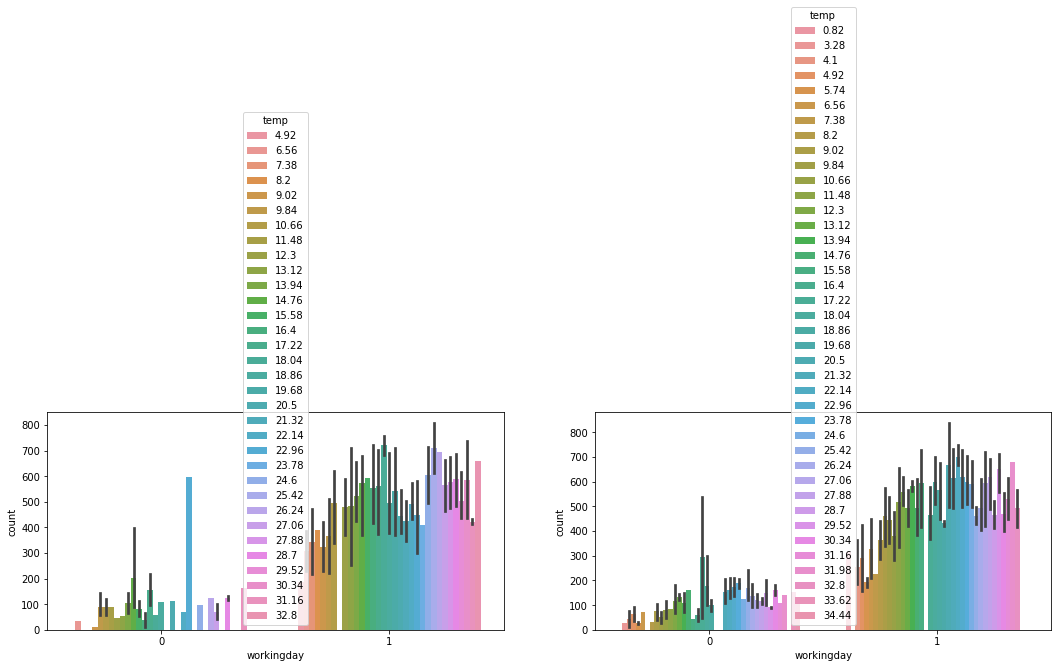

In [268]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=sosoweather, x="workingday", y="count", hue = "temp", ax=ax1)
sns.barplot(data=goodweather, x="workingday", y="count", hue = "temp", ax=ax2)

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(18,4)

#sns.barplot(data=sosoweather, x="humidity", y="count", hue = "atemp", ax=ax1)
#sns.barplot(data=goodweather, x="humidity", y="count", hue = "atemp", ax=ax2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
season        10886 non-null object
holiday       10886 non-null object
workingday    10886 non-null object
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null object
weekday       10886 non-null object
month         10886 non-null object
year          10886 non-null object
day           10886 non-null object
checktime     10886 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 1.5+ MB


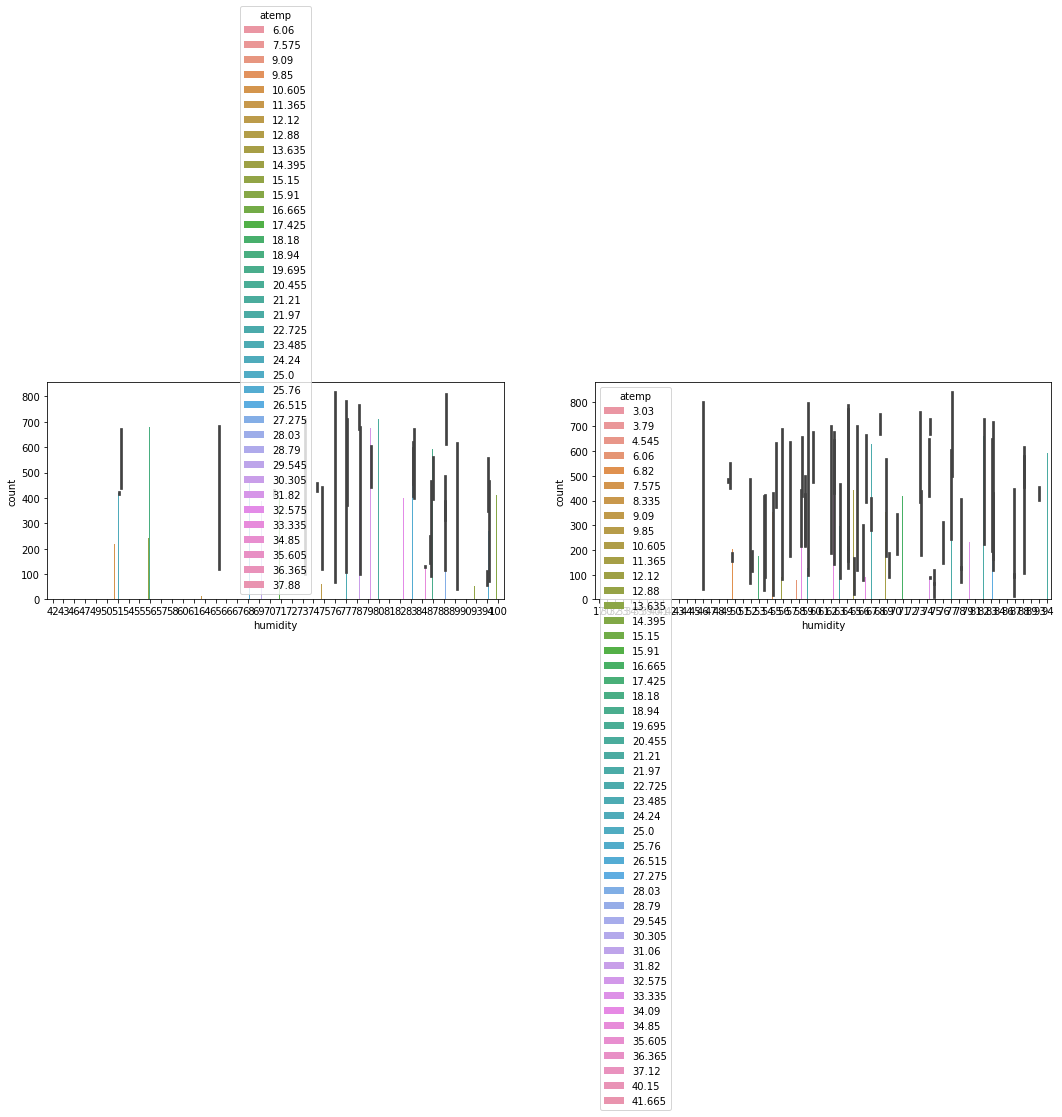

In [250]:
df_train.info()

In [251]:
df_test['season'] = df_train['season'].astype(str)
df_test['weather'] = df_train['weather'].astype(str)
df_test['hour'] = df_train['hour'].astype(str)
df_test['weekday'] = df_train['weekday'].astype(str)
df_test['month'] = df_train['month'].astype(str)
df_test['workingday'] = df_train['workingday'].astype(str)
df_test['holiday'] = df_train['holiday'].astype(str)

In [252]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
season        6493 non-null object
holiday       6493 non-null object
workingday    6493 non-null object
weather       6493 non-null object
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
date          6493 non-null object
hour          6493 non-null object
weekday       6493 non-null object
month         6493 non-null object
year          6493 non-null object
day           6493 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 710.2+ KB


In [253]:
df_test.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,year,day
0,1,0,0,1,10.66,11.365,56,26.0027,2011-01-20,00,5,1,2011,20


In [254]:
del df_test['date']

In [255]:
df_train.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year,day,checktime
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,5,1,2011,01,1


In [256]:
del df_train['date']
del df_train['casual']
del df_train['registered']
del df_train['checktime']

In [257]:
# 모델
'''from sklearn.model_selection import KFold'''

'from sklearn.model_selection import KFold'

In [258]:
'''yLabels = df_train['count']
del df_train['count']
dataTrain = df_train
dataTest = df_test'''

"yLabels = df_train['count']\ndel df_train['count']\ndataTrain = df_train\ndataTest = df_test"

In [259]:
'''def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))'''

'def rmsle(y, y_,convertExp=True):\n    if convertExp:\n        y = np.exp(y),\n        y_ = np.exp(y_)\n    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))\n    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))\n    calc = (log1 - log2) ** 2\n    return np.sqrt(np.mean(calc))'

In [260]:
'''from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))'''

'from sklearn.linear_model import LinearRegression,Ridge,Lasso\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import metrics\nimport warnings\npd.options.mode.chained_assignment = None\nwarnings.filterwarnings("ignore", category=DeprecationWarning)\n\n# Initialize logistic regression model\nlModel = LinearRegression()\n\n# Train the model\nyLabelsLog = np.log1p(yLabels)\nlModel.fit(X = dataTrain,y = yLabelsLog)\n\n# Make predictions\npreds = lModel.predict(X= dataTrain)\nprint ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))'

In [261]:
'''ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))'''

'ridge_m_ = Ridge()\nridge_params_ = { \'max_iter\':[3000],\'alpha\':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}\nrmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)\ngrid_ridge_m = GridSearchCV( ridge_m_,\n                          ridge_params_,\n                          scoring = rmsle_scorer,\n                          cv=5)\nyLabelsLog = np.log1p(yLabels)\ngrid_ridge_m.fit( dataTrain, yLabelsLog )\npreds = grid_ridge_m.predict(X= dataTrain)\nprint (grid_ridge_m.best_params_)\nprint ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))'

In [262]:
'''lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))'''

'lasso_m_ = Lasso()\n\nalpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])\nlasso_params_ = { \'max_iter\':[3000],\'alpha\':alpha}\n\ngrid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)\nyLabelsLog = np.log1p(yLabels)\ngrid_lasso_m.fit( dataTrain, yLabelsLog )\npreds = grid_lasso_m.predict(X= dataTrain)\nprint (grid_lasso_m.best_params_)\nprint ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))'